# PyTorch Workflow

We will be going through each step from getting the data into numbers, number representation, trainig and deploy. End-to-end workflow!


In [58]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [59]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural network achitecture
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.1.0+cu118'

## 1. Data (Preparing and Loading)

Data can be almost anything... in machine learning.

* Excel spreadsheet
* Images of any kind
* Videos (Youtube has lots of data...)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To shorcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with known **parameters**

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]) tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


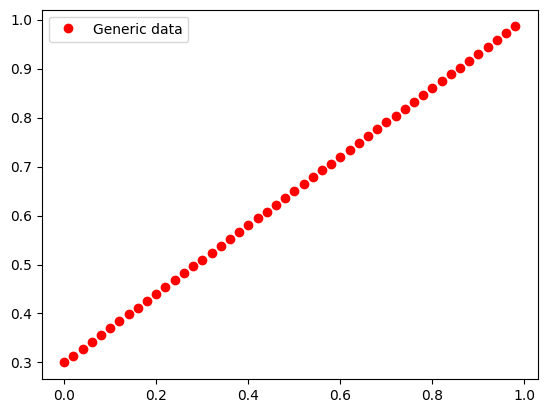

In [60]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
# Capital X is notation for tensors, while lowercase y is notation for the dependant variable
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias # Linear Regression formula

# Print the first 10 values of X (inputs) and y (outputs)
print(X[:10], y[:10])

# Plot data
plt.plot(X.numpy(), y.numpy(), 'ro', label='Generic data')
plt.legend()
plt.show()

In [61]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning data)

Analogy:

Course materials -> Practice exam -> Final exam

Training set -> Validation set -> Test set

Model learns paterns -> Model tunes patterns -> See if the model is ready for Generalization

60-80% -> 10-20% -> 10-20%

Let's create a training set with out data

In [62]:
# Create a train/test split (a method for our simple data)
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [63]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

How might we better visualize or data?

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize!"

In [64]:
def plot_predictions(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  # Check the documentation for the scatter function if there are any doubts
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c = 'b', label='Training data')

  # Plot test data in green
  plt.scatter(test_data, test_labels, c = 'g', label='Testing data')

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c = 'r', label='Predictions')

  # Show the legend
  plt.legend(prop={'size': 14})

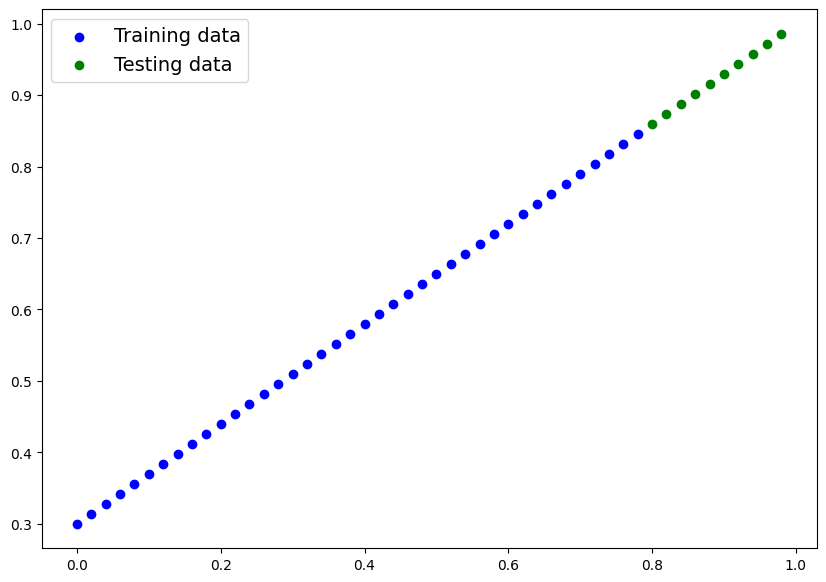

In [65]:
plot_predictions()

## 2. Build model

Our first PyTorch model! This is very exciting... I hope you have some experience with OOP, though

What our model class does:
* Start with random values (weight and bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent
2. Backpropagation

In [66]:
from torch import nn

# Create a linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.module
  # You can stack modules to create progressively more complex models

  # Constructor
  def __init__(self):
    super().__init__()
    # Parameter is a subclass of Tensor that gets automatically added to the list of a Module parameters
    self.weights = nn.Parameter(torch.randn(1, # <- start with a random weight and try to adjust it to the ideal weight
                                            requires_grad=True, # <- can this parameter be updated via gradient descent?
                                            dtype=torch.float)) # <- Pytorch loves the datatype torch.float32
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad = True,
                                         dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias # This is for the linear regression formula

The previous explicit implementation is only for educative purposes, most times we would be using the already implemented classes. Specially with bigger models we won't explicitly initialize the weights and biases, but rather entire layers.

You can check the [torch.nn](https://pytorch.org/tutorials/beginner/nn_tutorial.html) documentation. Essentially:
- nn.module contains the building blocks (A neural network can be considered a computational graph)
- torch.nn.Parameter : model parameters are the values to be used at each computation (the values to try and learn)
- requires_grad=True means PyTorch will track the gradients for a specific parameter for use with torch.autograd and gradient descent
- any subclass of nn.module needs to override forward() which defines the forward computation of the model!

Once the parameters have been randomly initialized, we want to correctly update them. There is where gradient descent and backpropagation come on handy.

It is useful to refer to the [torch cheatshet](https://pytorch.org/tutorials/beginner/ptcheat.html)

### Checking the contents of our PyTorch module.

Let's see what's inside our pytorch model using .parameters()

In [67]:
# Create a random seed
torch.manual_seed(42) # this is only for illustration, we want to start ideally from a random state

# Create an instance of the model
model_0 = LinearRegressionModel()

# Check the contents of the model
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [68]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [69]:
weight, bias

(0.7, 0.3)

In this example, we want to move the random initial parameters to the ideal values for weight and bias. Though, in most cases we don't know what the ideal values are

### Making predicitons using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts y_test bases on X_test.

When we pass data through our model, it's going to run it through the forward() method.

In [70]:
# the ideal y outputs for every X input in the test set
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [71]:
# make predictions with model
with torch.inference_mode():
  # Predicting in inference mode instead of using pred = model(X) is that we avoid
  # Keeping information that we do not need (the grad_gn)
  y_preds = model_0(X_test)

# An alternative is torch.no_grad(), however inference_mode() is prefered
with torch.no_grad():
  y_preds = model_0(X_test)

# the resulting y outputs for every X input in the test set
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

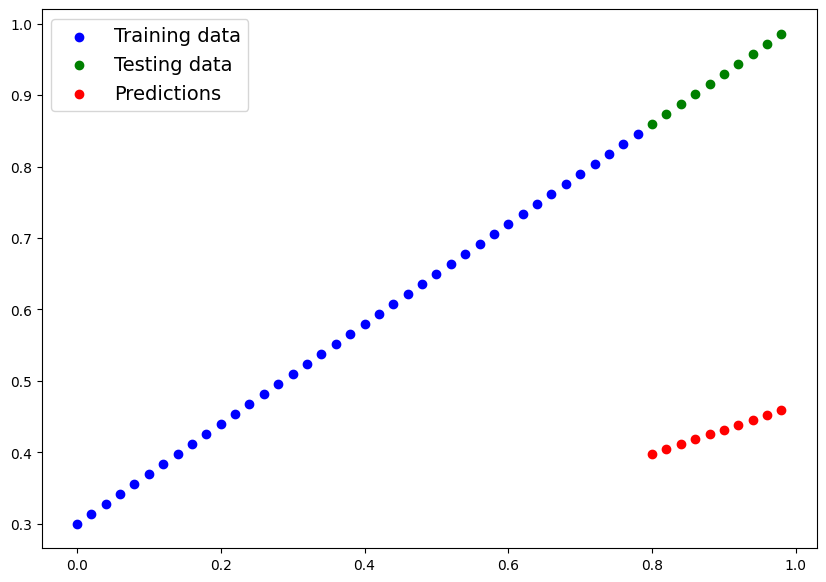

In [72]:
# Of course, this sucks. It is randomly predicting because we have not trained a thing yet
plot_predictions(predictions=y_preds)

## 3. Train Model

The idea of training is for a model to move from "unknown/random" parameter to some known parameters.

Poor representation -> Better representation.

The way we do it is through the use of a Loss function.

* Note: a Loss function may also be called cost function or criterion

Things we need to train:

* **Loss function:** A function to measure how wrong is the output of the model from the expected values.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (weight & bias)

Specificlly for PyTorch, we need:

*A training loop
*A testing loop

In [73]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [74]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [75]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.01) # lr = learning rate = possibly the most important hyperparameter you can set

Remember our weights tensor was randomly initialized as 0.3367? This means the following learning rates would change the weights as exposed:

* lr = 0.1 -> moves the 0.**_3_**367 digit
* lr = 0.01 -> moves the 0.3**_3_**67 digit
* lr = 0.001 -> moves the 0.33**_6_**7 digit

And so on...

Optimizer helps to tell if the way we are adjusting the loss function is working well or if we've got to move on a different direction in case results are not behaving as expected.

**Note: Learning scheduler**

A learning schedulers makes the steps of the learning rate get smaller as they approach to the minima to avoid jumping over it.

**What loss function and optimize should I use?**

This usually comes from experiences. Some examples are:
* For Linear regression, `nn.L1Loss()` and `torch.optim.SGD()` will suffice.
* For binary classification problems, a loss function like `nn.BCSLoss()` will be needed.

And so, the answer to this question will be case specific.

### Building a training loop (and testing loop) in PyTorch

A couple of thins we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through the model's `forward()` function) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**Backpropagation**)
5. Optimizer step- use the optimizer to adjust our model's parameters to try and improve the loss (**Gradient descent** - gradient is a slope)


In [76]:
# This is just to initialize everything off in case you want to run experiments with the code below
torch.manual_seed(42)

model_1 = LinearRegressionModel()
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)
list(model_1.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [77]:
# An epoch is one loop trough the data...
epochs = 200 # <- this is a hyperparameter as we set it ourselves

### Tracking experiments demand tracking different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training time!
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_1.train() # train mode in PyTorch set all parameters that require gradients to True

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train) # <- remember it receives input first, target then

  # 3. Optimizer zero grad (reset the gradients as they accumulate by default)
  optimizer.zero_grad()

  # 4. Perform Backpropagation on the loss with respect to the parameters of the model
  loss.backward() # <- compute the gradient of every parameter with require_grad = True

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # <- move on the computed gradient

  ### Testing
  model_1.eval() # turns off settings not needed for evaluation (dropout/batch normalization/etc)

  with torch.inference_mode(): # turns off gradient tracking (Also, fastest way of testing things)
    # with torch.no_grad() works too, but it's slower

    # 1. Forward pass
    test_pred = model_1(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print the loss every 10 epochs
  if (epoch + 1) % 10 == 0:
    epoch_count.append(epoch+1)
    loss_values.append(loss.item())
    test_loss_values.append(test_loss.item())

    # Print the epoch and loss
    print(f'Epoch: {epoch + 1} | Loss: {loss.item():.4f} | Test_loss: {test_loss.item():.4f}')
    # Print model state_dict
    print(model_1.state_dict())

Epoch: 10 | Loss: 0.2092 | Test_loss: 0.3598
OrderedDict([('weights', tensor([0.3757])), ('bias', tensor([0.2288]))])
Epoch: 20 | Loss: 0.0968 | Test_loss: 0.2282
OrderedDict([('weights', tensor([0.4146])), ('bias', tensor([0.3258]))])
Epoch: 30 | Loss: 0.0546 | Test_loss: 0.1497
OrderedDict([('weights', tensor([0.4483])), ('bias', tensor([0.3743]))])
Epoch: 40 | Loss: 0.0459 | Test_loss: 0.1154
OrderedDict([('weights', tensor([0.4728])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.0420 | Test_loss: 0.1003
OrderedDict([('weights', tensor([0.4920])), ('bias', tensor([0.3848]))])
Epoch: 60 | Loss: 0.0385 | Test_loss: 0.0893
OrderedDict([('weights', tensor([0.5100])), ('bias', tensor([0.3798]))])
Epoch: 70 | Loss: 0.0351 | Test_loss: 0.0810
OrderedDict([('weights', tensor([0.5272])), ('bias', tensor([0.3728]))])
Epoch: 80 | Loss: 0.0317 | Test_loss: 0.0734
OrderedDict([('weights', tensor([0.5441])), ('bias', tensor([0.3653]))])
Epoch: 90 | Loss: 0.0282 | Test_loss: 0.0652
OrderedDict

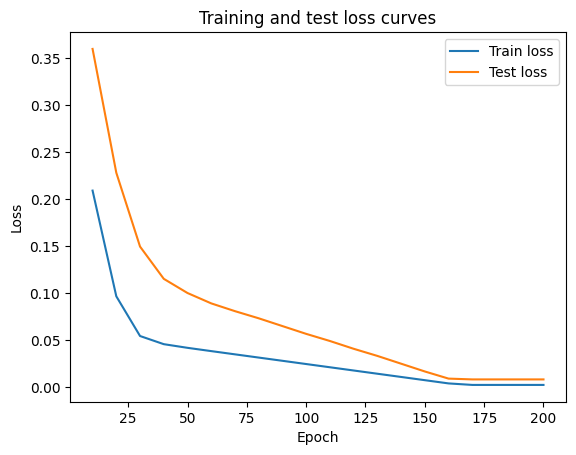

In [78]:
# Plot the loss curves
plt.plot(epoch_count, loss_values, label='Train loss')
plt.plot(epoch_count, test_loss_values, label='Test loss')
plt.title("Training and test loss curves")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Note:** In this toy problem we now exactly what the value we are looking for is for the weights and the bias (0.7 and 0.3). So we can check how closely they got to the desired values by checking the state_dict(). Then, we use inference_mode() to get updated predictions and now we see how they evolved over time

In [79]:
model_1.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

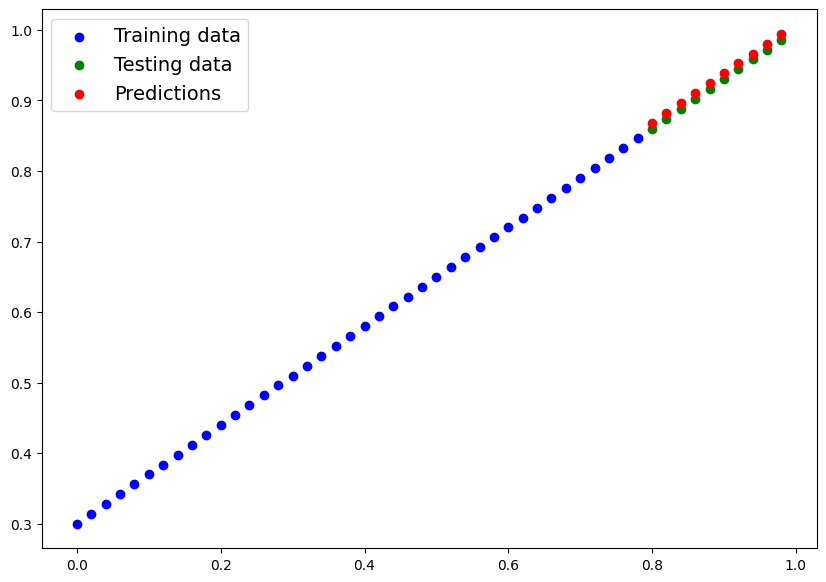

In [80]:
with torch.inference_mode():
  y_preds_new = model_1(X_test)

plot_predictions(predictions=y_preds_new)

## Saving a model in PyTorch

There are three main methods you should know about for saving and loading models in PyTorch.
1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

See: https://pytorch.org/tutorials/beginner/saving_loading_models.html

Something interesting I found out is that saving a model checkpoint is ~2-3 times larger than the model alone as we've got to save the model's state_dict as well as the optimizer's state_dict (which contains the gradient descent parameters), external `nn.Emedding` layers, last epoch of training, latest recorded loss, etc.

A convention is to save the PyTorch object as .pth (`torch.save` will zip this), use torchscript for scalability and deploy (also works in c++), and a dictionary a components as a .tar file.

In [81]:
# When working with enourmous models, it won't be so easy to check the state_dict, but the intuition is the same
model_1.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [82]:
# Saving out PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_PyTorch_Workflow.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state_dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(model_1.state_dict(),
           MODEL_SAVE_PATH)

Saving model to: models/01_PyTorch_Workflow.pth


In [83]:
!ls -l models

total 8
-rw-r--r-- 1 root root 1568 Dec  4 16:36 01_PyTorch_Workflow.pth
-rw-r--r-- 1 root root 1560 Dec  4 13:55 model_1.pth


## Loading a PyTorch model
Since we saved our model's state_dict rather than the entire model, we must initialize the model again and use the `.load_state_dict` method to update its weights

In [84]:
# Now let's try to load a model for inference

# First, we instantiate a new instance of our model class
loaded_model = LinearRegressionModel()

# Check the state_dict before update
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.2345])), ('bias', tensor([0.2303]))])

In [85]:
# Then, load the weights from the saved .pth
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Check the state_dict now
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [86]:
# Let's see if this actually works!
loaded_model.eval(), model_1.eval()
with torch.inference_mode():
  y_preds_loaded = loaded_model(X_test)
  y_preds = model_1(X_test)

y_preds_loaded == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back through the steps above and put it all together

In [87]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.1.0+cu118'

Create device-agnostic code.

Use either GPU or CPU depending on what's available

In [88]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


### 6.1 Data

In [89]:
# Create some data using linear regression formula y = weight * X + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and Y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will pop up
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [90]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

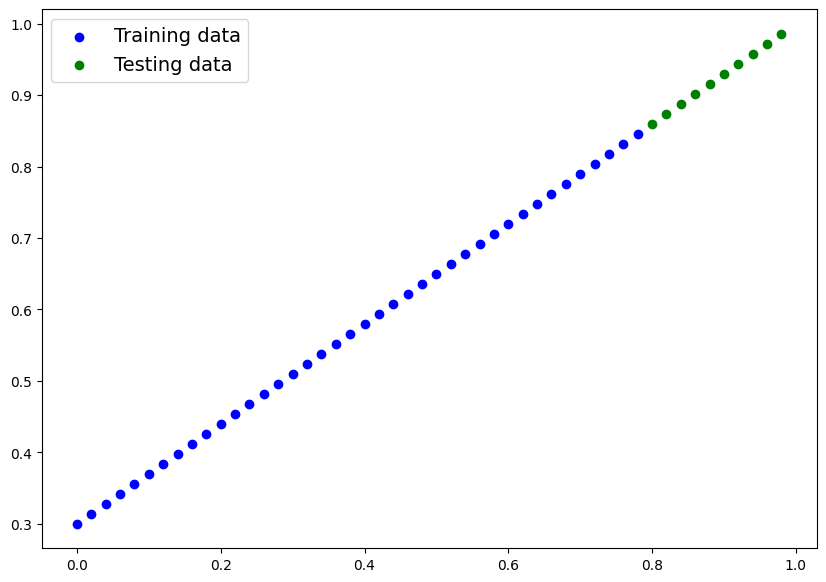

In [91]:
# Plot the data (using the plot_prediction function above)
plot_predictions(X_train, y_train, X_test, y_test)

### 6.2 Building a PyTorch Linear model

`torch.nn` contains the most important layers we would ever use in machine learning.

`nn.Linear` performs a linear regression behind the scenes, for instance.

In [92]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  # this time, instead of initializing the parameters, let's initialize a layer
  def __init__(self):
    super().__init__()
    # Using nn.Linear() for creating the model's parameters / also called: linear transform, probing layer, fully connected layer, dense layer (in tf)
    self.linear_layer = nn.Linear(in_features=1, # <- one feature gets in for this case
                                  out_features=1) # <- one feature gets out for the input (which is also one in this case)

  # Here we explicitly define that the x we are expecting is a torch.Tensor and -> torch.Tensor means it returns a torch.Tensor
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)

model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [93]:
# Check the model current device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

### 6.3 Training

For training we need:
* Loss function
* Optimizer
* Training Loop
* Testing Loop

In [94]:
# Setup loss function
loss_fn = nn.L1Loss()

# Setup optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [95]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

# Device agnostic code for data
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Compute the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch}, Loss: {loss:.4f}, Test Loss: {test_loss:.4f}")

Epoch: 0, Loss: 0.5552, Test Loss: 0.5740
Epoch: 10, Loss: 0.4400, Test Loss: 0.4393
Epoch: 20, Loss: 0.3248, Test Loss: 0.3046
Epoch: 30, Loss: 0.2095, Test Loss: 0.1698
Epoch: 40, Loss: 0.0943, Test Loss: 0.0351
Epoch: 50, Loss: 0.0239, Test Loss: 0.0478
Epoch: 60, Loss: 0.0200, Test Loss: 0.0458
Epoch: 70, Loss: 0.0165, Test Loss: 0.0375
Epoch: 80, Loss: 0.0131, Test Loss: 0.0299
Epoch: 90, Loss: 0.0097, Test Loss: 0.0217
Epoch: 100, Loss: 0.0062, Test Loss: 0.0141
Epoch: 110, Loss: 0.0028, Test Loss: 0.0058
Epoch: 120, Loss: 0.0013, Test Loss: 0.0138
Epoch: 130, Loss: 0.0013, Test Loss: 0.0138
Epoch: 140, Loss: 0.0013, Test Loss: 0.0138
Epoch: 150, Loss: 0.0013, Test Loss: 0.0138
Epoch: 160, Loss: 0.0013, Test Loss: 0.0138
Epoch: 170, Loss: 0.0013, Test Loss: 0.0138
Epoch: 180, Loss: 0.0013, Test Loss: 0.0138
Epoch: 190, Loss: 0.0013, Test Loss: 0.0138


In [96]:
# Let's see how the parameters updated after training
model_1.state_dict(), weight, bias

(OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
              ('linear_layer.bias', tensor([0.3025]))]),
 0.7,
 0.3)

### 6.4 Making and evaluating predictions

In [97]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

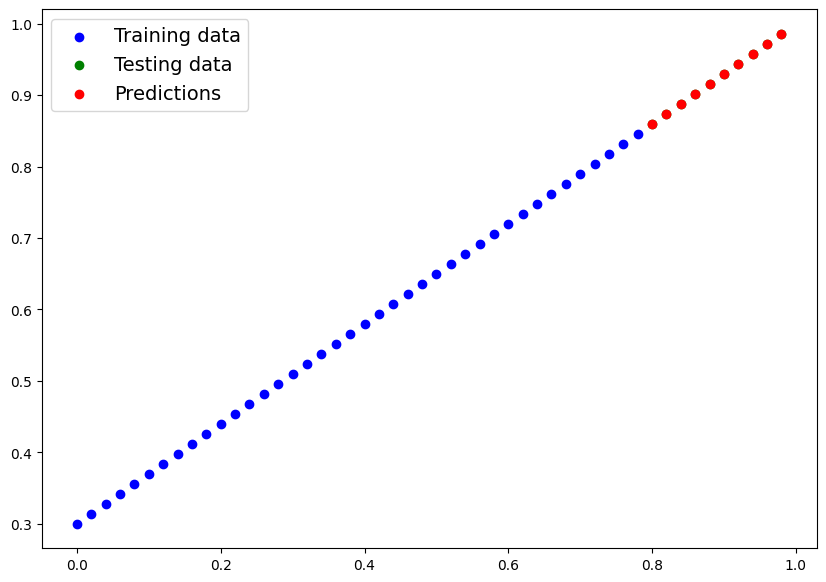

In [98]:
# Visualize!
plot_predictions(predictions=y_preds)

### 6.5 Saving & loading a train model

In [99]:
# Save the model
from pathlib import Path

# 1. Create a models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/model_1.pth


In [100]:
# Load a PyTorch model

# Create a new instance of the model
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [101]:
# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the model to device
loaded_model_1.to(device)

loaded_model_1.state_dict(), next(loaded_model_1.parameters()).device

(OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
              ('linear_layer.bias', tensor([0.3025]))]),
 device(type='cpu'))

In [102]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Exercises & Extra-curriculum

Check:
* Read What is [torch.nn](https://pytorch.org/tutorials/beginner/nn_tutorial.html), really? by Jeremy Howard for a deeper understanding of how one of the most important modules in PyTorch works.
* Spend 10-minutes scrolling through and checking out the [PyTorch documentation cheatsheet](https://pytorch.org/tutorials/beginner/ptcheat.html) for all of the different PyTorch modules you might come across.
* Spend 10-minutes reading the [loading and saving documentation on the PyTorch website](https://pytorch.org/tutorials/beginner/saving_loading_models.html) to become more familiar with the different saving and loading options in PyTorch.
* Spend 1-2 hours read/watching the following for an overview of the internals of gradient descent and backpropagation, the two main algorithms that have been working in the background to help our model learn.
* [Wikipedia page for gradient descent] (https://en.wikipedia.org/wiki/Gradient_descent)
* [Gradient Descent Algorithm — a deep dive](https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21) by Robert Kwiatkowski
* [Gradient descent, how neural networks learn](https://youtu.be/IHZwWFHWa-w) video by 3Blue1Brown
* [What is backpropagation really doing?](https://youtu.be/Ilg3gGewQ5U) video by 3Blue1Brown
* [Backpropagation Wikipedia Page](https://en.wikipedia.org/wiki/Backpropagation)

1. Create a straight line dataset using the linear regression formula (weight * X + bias).
Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
Split the data into 80% training, 20% testing.
Plot the training and testing data so it becomes visual.


In [156]:
# Device - agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [157]:
# Create straight line dataset
weight = 0.3
bias = 0.9

start= -20
end = 30
step = 0.3

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[-20.0000],
         [-19.7000],
         [-19.4000],
         [-19.1000],
         [-18.8000],
         [-18.5000],
         [-18.2000],
         [-17.9000],
         [-17.6000],
         [-17.3000]]),
 tensor([[-5.1000],
         [-5.0100],
         [-4.9200],
         [-4.8300],
         [-4.7400],
         [-4.6500],
         [-4.5600],
         [-4.4700],
         [-4.3800],
         [-4.2900]]))

In [158]:
# I forgot to remove single dimensions from the X matrix and suffered a lot bacause of shape mismatching
# X.shape, y.shape

In [159]:
# Train test split
train_test = int(len(X) * 0.8)

X_train, y_train = X[:train_test], y[:train_test]
X_test, y_test = X[train_test:], y[train_test:]

len(X_train), len(y_train), len(X_test), len(y_test)

(133, 133, 34, 34)

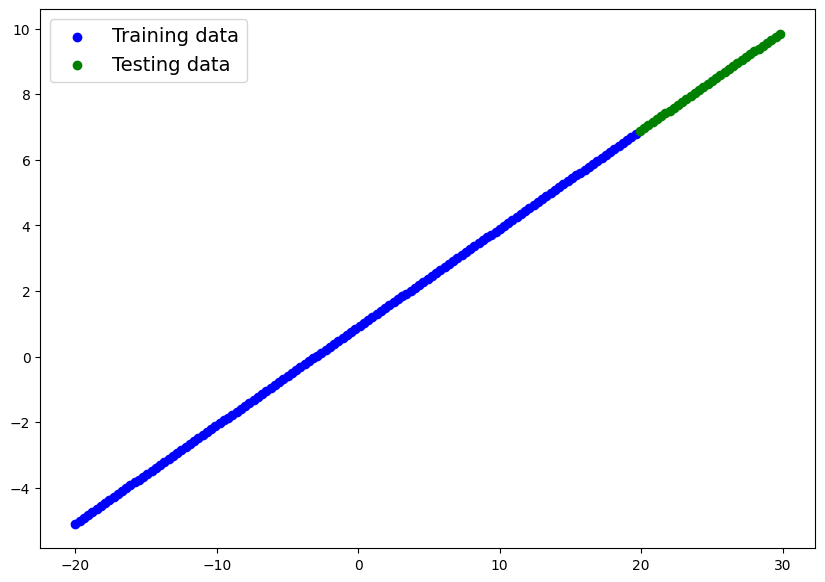

In [160]:
plot_predictions(X_train, y_train, X_test, y_test)

2. Build a PyTorch model by subclassing nn.Module.

Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.

Implement the forward() method to compute the linear regression function you used to create the dataset in 1.

Once you've constructed the model, make an instance of it and check its state_dict().

Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.

In [161]:
class LinearRegressionExercise(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

class LinearRegressionNoNNLinear(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.rand(1,
                                          requires_grad=True,
                                          dtype=torch.float))
    self.bias = nn.Parameter(torch.rand(1,
                                        requires_grad=True,
                                        dtype=torch.float))

  def forward(self, x):
    return self.weight * x + self.bias

3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.

Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.

Write a training loop to perform the appropriate training steps for 300 epochs.

The training loop should test the model on the test dataset every 20 epochs.

In [162]:
torch.manual_seed(42)

linear_layer_rm = LinearRegressionExercise()
parameters_rm = LinearRegressionNoNNLinear()

# Move models to device
linear_layer_rm.to(device)
parameters_rm.to(device)

loss_fn = nn.L1Loss()
optimizer_ll = torch.optim.SGD(linear_layer_rm.parameters(), lr=0.01)
optimizer_param = torch.optim.SGD(parameters_rm.parameters(), lr=0.01)

linear_layer_rm.state_dict(), parameters_rm.state_dict()

(OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]),
 OrderedDict([('weight', tensor([0.3829])), ('bias', tensor([0.9593]))]))

In [163]:
### Training
epochs = 300

# logs
train_loss_values_ll = []
test_loss_values_ll = []

train_loss_values = []
test_loss_values = []\

# Device - agnostic data
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  linear_layer_rm.train()
  parameters_rm.train()

  # Forward Pass
  ll_preds = linear_layer_rm(X_train)
  pram_preds = parameters_rm(X_train)

  # Loss
  ll_loss = loss_fn(ll_preds, y_train)
  pram_loss = loss_fn(pram_preds, y_train)

  # Optimizer zero grad
  optimizer_ll.zero_grad()
  optimizer_param.zero_grad()

  # Backpropagate
  ll_loss.backward()
  pram_loss.backward()

  # Optimizer step
  optimizer_ll.step()
  optimizer_param.step()

  ### Testing
  linear_layer_rm.eval()
  parameters_rm.eval()
  with torch.inference_mode():
    ll_preds_test = linear_layer_rm(X_test)
    pram_preds_test = parameters_rm(X_test)

    loss_ll_test = loss_fn(ll_preds_test, y_test)
    loss_pram_test = loss_fn(pram_preds_test, y_test)

  # Logs
  train_loss_values_ll.append(ll_loss.item())
  test_loss_values_ll.append(loss_ll_test.item())

  train_loss_values.append(pram_loss.item())
  test_loss_values.append(loss_pram_test.item())

  # Prints
  if epoch % 20 == 0:
    print(f'Linear Layer inititialized model')
    print(f'Epoch: {epoch} | Train Loss: {ll_loss.item():.4f} | Test Loss: {loss_ll_test.item():.4f}')
    print(f'Parameters initialized model')
    print(f'Epoch: {epoch} | Train Loss: {pram_loss.item():.4f} | Test Loss: {loss_pram_test.item():.4f}')

Linear Layer inititialized model
Epoch: 0 | Train Loss: 4.6351 | Test Loss: 8.9954
Parameters initialized model
Epoch: 0 | Train Loss: 0.8271 | Test Loss: 0.3582
Linear Layer inititialized model
Epoch: 20 | Train Loss: 0.6132 | Test Loss: 1.0091
Parameters initialized model
Epoch: 20 | Train Loss: 0.7036 | Test Loss: 0.6798
Linear Layer inititialized model
Epoch: 40 | Train Loss: 0.5854 | Test Loss: 1.0662
Parameters initialized model
Epoch: 40 | Train Loss: 0.6712 | Test Loss: 0.7699
Linear Layer inititialized model
Epoch: 60 | Train Loss: 0.5757 | Test Loss: 1.0834
Parameters initialized model
Epoch: 60 | Train Loss: 0.6531 | Test Loss: 0.8232
Linear Layer inititialized model
Epoch: 80 | Train Loss: 0.5664 | Test Loss: 1.0990
Parameters initialized model
Epoch: 80 | Train Loss: 0.6412 | Test Loss: 0.8583
Linear Layer inititialized model
Epoch: 100 | Train Loss: 0.5632 | Test Loss: 1.1005
Parameters initialized model
Epoch: 100 | Train Loss: 0.6367 | Test Loss: 0.8740
Linear Layer ini

4. Make predictions with the trained model on the test data.

Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

Linear Layer
Parameters


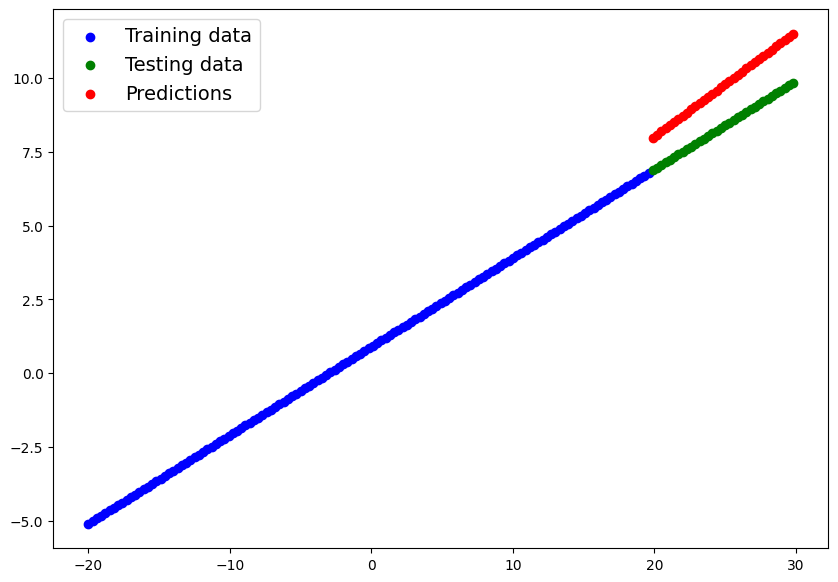

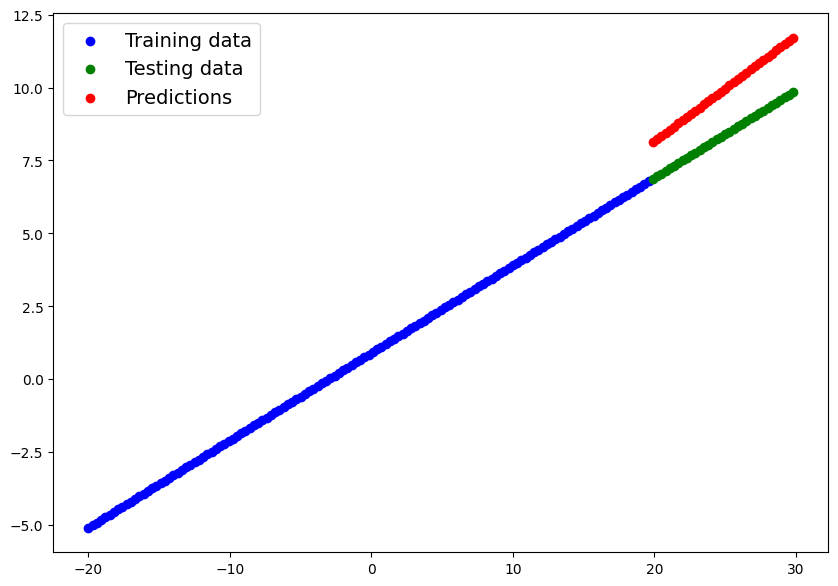

In [166]:
with torch.inference_mode():
  ll_preds_test = linear_layer_rm(X_test)
  pram_preds_test = parameters_rm(X_test)

print("Linear Layer")
plot_predictions(X_train, y_train, X_test, y_test, ll_preds_test)
print("Parameters")
plot_predictions(X_train, y_train, X_test, y_test, pram_preds_test)

5. Save your trained model's state_dict() to file.

Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.

Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [ ]:
# Save the model
torch.save(linear_layer_rm.state_dict(), "linear_layer_rm.pth")
torch.save(parameters_rm.state_dict(), "parameters_rm.pth")

# Load the model
linear_layer_rm = LinearRegressionExercise()
parameters_rm = LinearRegressionNoNNLinear()

linear_layer_rm.load_state_dict(torch.load("linear_layer_rm.pth"))
parameters_rm.load_state_dict(torch.load("parameters_rm.pth"))